<a href="https://colab.research.google.com/github/maryline321/datascience/blob/main/MachileLearning_LinearRregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
# Import modules we'll need for this notebook
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [65]:

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Data = pd.read_csv('daily-bike-share.csv')
Data.head(2)

--2021-08-27 23:31:19--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.6’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.01s   

2021-08-27 23:31:19 (4.45 MB/s) - ‘daily-bike-share.csv.6’ saved [48800/48800]



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131


In [66]:
Data['day'] = pd.DatetimeIndex(Data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
Data[numeric_features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [67]:
# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = Data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 511 rows
Test Set: 220 rows


In [68]:
# Fit a lasso model on the training set
model = Lasso().fit(X_train, y_train)
print (model, "\n")


Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False) 



In [69]:
predictions=model.predict(X_test)
mse=mean_squared_error(y_test, predictions)
print("MSE", mse)


MSE 201155.70593338404


In [70]:
rmse=np.sqrt(mse)
print("RMSE", rmse)

RMSE 448.5038527519959


In [71]:
r2=r2_score(y_test, predictions)
print("R2", r2)

R2 0.6056468637824488


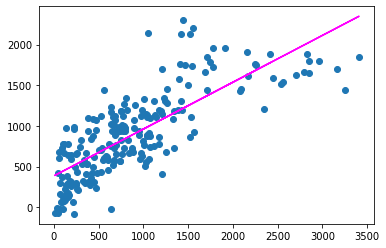

In [72]:
%matplotlib inline

# Plot predicted vs actual

plt.scatter(y_test, predictions)
plt.xlabel=('Actual Labels')
plt.ylabel=('predicted labels')
plt.title=('Bike Rental Predictions')


z=np.polyfit(y_test, predictions,1)
p=np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [73]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_text

model =DecisionTreeRegressor().fit(X_train, y_train)
tree= export_text(model)
tree

'|--- feature_6 <= 0.45\n|   |--- feature_4 <= 0.50\n|   |   |--- feature_7 <= 0.32\n|   |   |   |--- feature_8 <= 0.41\n|   |   |   |   |--- feature_1 <= 2.50\n|   |   |   |   |   |--- feature_3 <= 3.00\n|   |   |   |   |   |   |--- feature_1 <= 1.50\n|   |   |   |   |   |   |   |--- value: [558.00]\n|   |   |   |   |   |   |--- feature_1 >  1.50\n|   |   |   |   |   |   |   |--- value: [515.00]\n|   |   |   |   |   |--- feature_3 >  3.00\n|   |   |   |   |   |   |--- value: [317.00]\n|   |   |   |   |--- feature_1 >  2.50\n|   |   |   |   |   |--- feature_8 <= 0.40\n|   |   |   |   |   |   |--- feature_9 <= 0.22\n|   |   |   |   |   |   |   |--- value: [981.00]\n|   |   |   |   |   |   |--- feature_9 >  0.22\n|   |   |   |   |   |   |   |--- value: [968.00]\n|   |   |   |   |   |--- feature_8 >  0.40\n|   |   |   |   |   |   |--- feature_9 <= 0.36\n|   |   |   |   |   |   |   |--- value: [710.00]\n|   |   |   |   |   |   |--- feature_9 >  0.36\n|   |   |   |   |   |   |   |--- value:

MSE: 235161.03181818183
RMSE: 484.9340489367413
R2: 0.5389815566834255


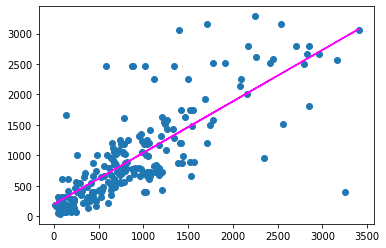

In [74]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel=('Actual Labels')
plt.ylabel=('predicted labels')
plt.title=('Bike Rental Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [75]:
from sklearn.ensemble import RandomForestRegressor

model=RandomForestRegressor().fit(X_train, y_train)
print(model,"\n")

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 



MSE: 113845.0619309091
RMSE: 337.4093388317951
R2: 0.7768139014152395


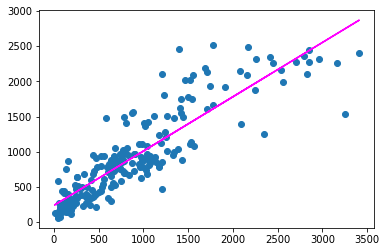

In [76]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel=('Actual Labels')
plt.ylabel=('predicted labels')
plt.title=('Bike Rental Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

model=GradientBoostingClassifier().fit(X_train, y_train)
print(model,"\n")

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 



MSE: 507214.16818181815
RMSE: 712.1896995757648
R2: 0.005638457888354598


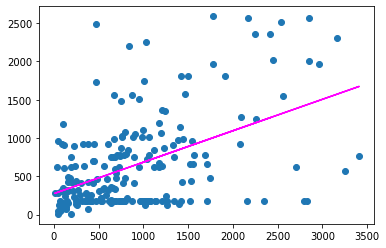

In [78]:
# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel=('Actual Labels')
plt.ylabel=('predicted labels')
plt.title=('Bike Rental Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()


